<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Advance_Regression/02-03-04-non-linear-asymptotic-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 4. Asymptotic Models

Asymptotic models or functions describe the behavior of functions as the input grows towards infinity or some critical point. In the context of fitting models to data, asymptotic functions often capture the concept that the response variable approaches a limiting value as the predictor variable increases. These functions are particularly useful in biological, ecological, and pharmacokinetic modeling.

1. **Michaelis–Menten**: Commonly used in biochemistry for enzyme kinetics.
2. **2-Parameter Asymptotic Exponential**: Used in modeling biological growth, decay processes, and pharmacokinetics.
3. **3-Parameter Asymptotic Exponential**: Suitable for situations where there is an initial delay before the process starts, such as latency periods in pharmacokinetics or delayed responses in ecological studies.

These models are essential tools in various scientific fields to describe processes that approach a limit but never quite reach it, providing insights into the underlying mechanisms of the observed phenomena.





### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314972 sha256=174d6e4a8717013b2ecd379e88bdd2edb03fb411154553d3d35c2e3b45618ddf
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fit Asymptotic Models in R

In this tutorial, we will demonstrate how to fit asymptotic models to data using R.



### Install Rrequired R Packages

In [3]:
%%R
# Packages List
packages <- c(
  "tidyverse",   # Includes readr, dplyr, ggplot2, etc.
  'patchwork', # for visualization
  'minpack.lm', # for damped exponential model
  'nlstools', # for bootstrapping
  'nls2', # for fitting multiple models
  'broom' # for tidying model output
)

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse  patchwork minpack.lm   nlstools       nls2      broom 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 


### Load R Packages

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:broom"      "package:nls2"       "package:proto"     
 [4] "package:nlstools"   "package:minpack.lm" "package:patchwork" 
 [7] "package:lubridate"  "package:forcats"    "package:stringr"   
[10] "package:dplyr"      "package:purrr"      "package:readr"     
[13] "package:tidyr"      "package:tibble"     "package:ggplot2"   
[16] "package:tidyverse"  "package:tools"      "package:stats"     
[19] "package:graphics"   "package:grDevices"  "package:utils"     
[22] "package:datasets"   "package:methods"    "package:base"      


## Michaelis–Menten Function

The Michaelis–Menten equation is widely used in enzyme kinetics to describe the rate of enzymatic reactions. It models how the reaction rate depends on the concentration of a substrate.

$$ V = \frac{V_{\max} \cdot [S]}{K_m + [S]}  $$

- $V$: Reaction rate (dependent variable)
- $[S]$: Substrate concentration (independent variable)
- $V_{\max}$: Maximum reaction rate
- $K_m$: Michaelis constant (substrate concentration at which the reaction rate is half of $V_{\max}$)



### Generate Synthetic Data

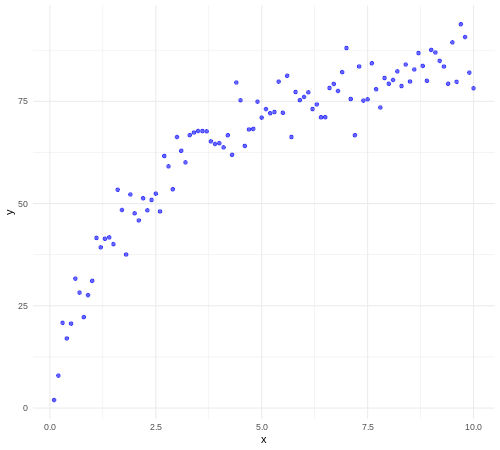

In [7]:
%%R -w 500 -h 450 -u px

# Example data with noise
set.seed(123)
# Generate synthetic enzyme kinetics data
set.seed(123)
x<- seq(0.1, 10, length.out = 100)
Vmax <- 100  # maximum reaction rate
Km <- 2      # Michaelis constant
y <- Vmax * x / (Km + x) + rnorm(100, sd = 5)
# Create a data frame
data.1 <- data.frame(x = x, y = y)
# plot data
ggplot(data.1, aes(x = x, y = y)) +
  geom_point(alpha = 0.6, color = "blue") +
  theme_minimal()

In [8]:
%%R -w 800 -h 500 -u px

# Define the asymptotic model function (Michaelis-Menten)
asymptotic_model <- function(substrate_conc, Vmax, Km) {
  Vmax * substrate_conc / (Km + substrate_conc)
}

# Fit the asymptotic model to the data using non-linear least squares
fit.1 <- nls(y ~ asymptotic_model(x, Vmax, Km),
           data = data.1, start = list(Vmax = 100, Km = 2))

# Get the summary of the fit
summary(fit.1)


Formula: y ~ asymptotic_model(x, Vmax, Km)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
Vmax 101.6957     1.8667   54.48   <2e-16 ***
Km     2.0732     0.1279   16.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.578 on 98 degrees of freedom

Number of iterations to convergence: 3 
Achieved convergence tolerance: 1.315e-06



### Extract Parameters


In [9]:
%%R
# Extract parameters
Vmax <- coef(fit.1)["Vmax"]
Km <- coef(fit.1)["Km"]
Vmax
Km



      Km 
2.073214 


### Plot the Fitted Model


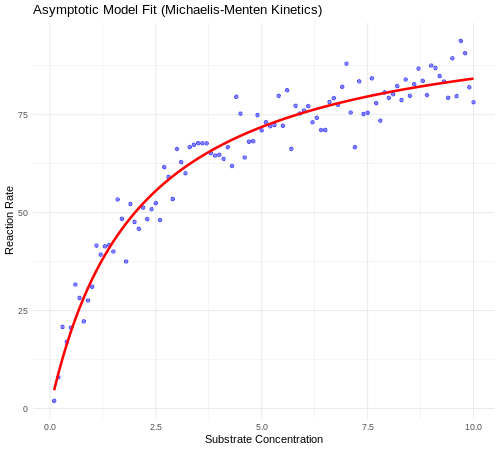

In [10]:
%%R -w 500 -h 450 -u px

# Predict using the fitted model
data.1$pred <- predict(fit.1, newdata = data.1)

# Plot the original data and the fitted asymptotic model
ggplot(data.1, aes(x = x, y = y)) +
  geom_point(color = "blue", alpha = 0.5) +
  geom_line(aes(y = pred), color = "red", size = 1.2) +
  ggtitle("Asymptotic Model Fit (Michaelis-Menten Kinetics)") +
  xlab("Substrate Concentration") + ylab("Reaction Rate") +
  theme_minimal()

## 2-Parameter Asymptotic Exponential Function

This model describes a process that asymptotically approaches a maximum value with an exponential decay rate. It is often used in growth processes, pharmacokinetics, and environmental modeling.

$$ y = a \left(1 - e^{-bx}\right) $$

- $y$: Dependent variable
- $x$: Independent variable
- $a$: Asymptotic maximum value
- $b$: Rate constant


### Generate Data

In [11]:
%%R
# Generate synthetic data
set.seed(123)
x <- seq(0, 10, length.out = 100)
asymptote <- 50
rate <- 0.3
y <- asymptote * (1 - exp(-rate * x)) + rnorm(100, sd = 2)

# Create a data frame
data.2 <- data.frame(x = x, y = y)



### Fit the Model

In [12]:
%%R -w 500 -h 450 -u px
# Fit the model
fit.2 <- nls(
  y ~ asymptote + b * exp(-c * x),
  data = data.2,
  start = list(b = 0.1, c = 0.1)  # Reasonable starting guesses
)

# Summary of results
summary(fit.2)



Formula: y ~ asymptote + b * exp(-c * x)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
b -49.916719   0.633496  -78.80   <2e-16 ***
c   0.301867   0.005664   53.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.84 on 98 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 1.909e-07



### Plot the Fitted Model

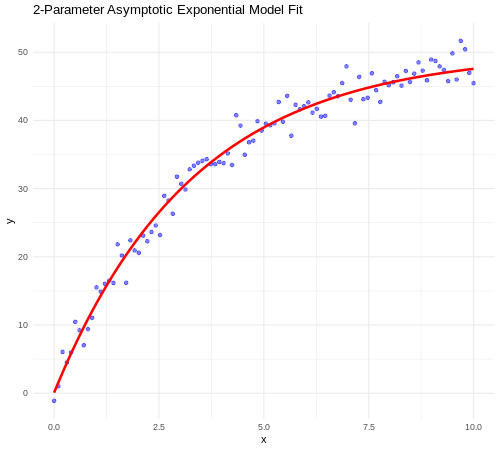

In [13]:
%%R -w 500 -h 450 -u px

# Predict using fitted model

data.2$pred <- predict(fit.2, newdata = data.2)

# Plot the original data and the fitted asymptotic exponential model
ggplot(data.2, aes(x = x, y = y)) +
  geom_point(color = "blue", alpha = 0.5) +
  geom_line(aes(y = pred), color = "red", size = 1.2) +
  ggtitle("2-Parameter Asymptotic Exponential Model Fit") +
  xlab("x") + ylab("y") +
  theme_minimal()

## 3-Parameter Asymptotic Exponential Function

This model extends the 2-parameter model by including a horizontal shift, allowing for more flexibility in fitting data where the process starts at a point other than zero.


$$ y = a \left(1 - e^{-b(x - c)}\right)  $$

- $y$: Dependent variable
- $x$: Independent variable
- $a$: Asymptotic maximum value
- $b$: Rate constant
- $c$: Horizontal shift (delay before the exponential growth starts)

### Data Generation

In [14]:
%%R
# Simulating some data
set.seed(123)
x <- 1:10
y <- c(1.5, 2.5, 4.5, 4.9, 5.6, 6.2, 6.8, 7.1, 7.5, 7.8) + rnorm(10, 0, 0.2)

# Put data into a dataframe
data.3 <- data.frame(x, y)

### Fit Using Manual Starting Values

   - Estimate starting values:
     - $a_0$: Slightly above the maximum observed $y$ (e.g., $\text{max}(y) + 5$)
     - Linearize $\ln(a_0 - y) = \ln(b) - c \cdot x$ to estimate $b_0$ and $c_0$

In [15]:
%%R
   # Estimate starting values
   max_y <- max(data.3$y)
   a0 <- max_y + 5  # Adjust based on data
   z <- log(a0 - data.3$y)
   lin_model <- lm(z ~ data.3$x)
   b0 <- exp(coef(lin_model)[1])
   c0 <- -coef(lin_model)[2]

   # Fit the Model with `nls()`**
  fit.3<- nls(y ~ a - b * exp(-c * x),
                data = data.3,
                start = list(a = a0, b = b0, c = c0))
   summary(fit.3)


Formula: y ~ a - b * exp(-c * x)

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  8.16864    0.50583  16.149 8.49e-07 ***
b  9.00788    0.51245  17.578 4.75e-07 ***
c  0.26969    0.05218   5.169   0.0013 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3512 on 7 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 8.369e-07



### Plot the Fitted Model

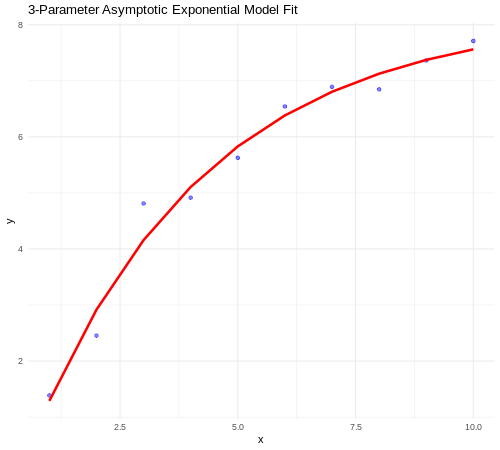

In [16]:
%%R -w 500 -h 450 -u px
# Predict using the fitted model
data.3$pred <- predict(fit.3, newdata = data.3)

# Plot the original data and the fitted asymptotic exponential model
ggplot(data.3, aes(x = x, y = y)) +
  geom_point(color = "blue", alpha = 0.5) +
  geom_line(aes(y = pred), color = "red", size = 1.2) +
  ggtitle("3-Parameter Asymptotic Exponential Model Fit") +
  xlab("x") + ylab("y") +
  theme_minimal()

## Fit Asymptotic Model with Real Data

In this exercise we will fit the three models to real data on jaw growth in Deer. The data contains measurements of bone growth in rats at different ages. We will compare the performance of the Michaelis-Menten, 2-parameter asymptotic exponential, and 3-parameter asymptotic exponential models. The data is available in the file `jaw_data.csv`.

In [17]:
%%R
# Load the data
jaw_data <- readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/jaw_data.csv") |>
 filter(age > 0) |>  # Remove age = 0
 glimpse()

Rows: 54 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): age, bone

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 53
Columns: 2
$ age  <dbl> 5.112000, 1.320000, 35.240000, 1.632931, 2.297635, 3.322125, 4.04…
$ bone <dbl> 20.22000, 11.11130, 140.65000, 26.15218, 10.00100, 55.85634, 46.0…


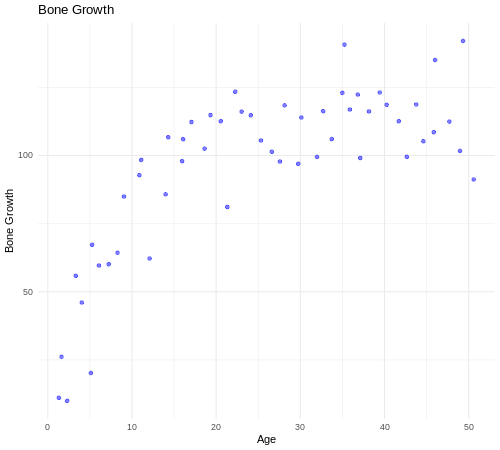

In [18]:
%%R -w 500 -h 450 -u px
# Plot the original data and the fitted asymptotic exponential model
ggplot(jaw_data, aes(x = age, y = bone)) +
  geom_point(color = "blue", alpha = 0.5) +
  xlab("Age") + ylab("Bone Growth") +
  ggtitle("Bone Growth") +
  theme_minimal()

### Fit Michaelis-Menten Model

Manually specify starting values:

In [22]:
%%R
mm_model <- nls(
  bone ~ (Vmax * age) / (Km + age),
  data = jaw_data,
  start = list(Vmax = 140, Km = 10)  # Adjusted starting guesses
)
summary(mm_model)


Formula: bone ~ (Vmax * age)/(Km + age)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
Vmax  137.723      5.965  23.089  < 2e-16 ***
Km      7.355      1.277   5.757 4.91e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.9 on 51 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.457e-06



### Fit  2-Parameter Asymptotic Exponential Model

Fix asymptote at the maximum observed `bone` value:

In [23]:
%%R
asym <- max(jaw_data$bone)  # asym = 142
exp2_model <- nls(
  bone ~ asym + b * exp(-c * age),
  data = jaw_data,
  start = list(b = 100, c = 0.1)
)
summary(exp2_model)


Formula: bone ~ asym + b * exp(-c * age)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
b -1.136e+02  7.231e+00  -15.71  < 2e-16 ***
c  4.577e-02  4.558e-03   10.04 1.12e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.79 on 51 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 9.933e-06



### Fit 3-Parameter Asymptotic Exponential

Estimate asymptote dynamically:

In [24]:
%%R
exp3_model <- nls(
  bone ~ asym + (y0 - asym) * exp(-c * age),
  data = jaw_data,
  start = list(asym = 130, y0 = 20, c = 0.1)
)
summary(exp3_model)


Formula: bone ~ asym + (y0 - asym) * exp(-c * age)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
asym 115.05798    2.96285  38.834  < 2e-16 ***
y0    -5.54489   10.69431  -0.518    0.606    
c      0.12642    0.01979   6.390 5.41e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.33 on 50 degrees of freedom

Number of iterations to convergence: 4 
Achieved convergence tolerance: 5.844e-07



### Compare Model Performance

In [25]:
%%R
# Extract metrics
metrics <- tibble(
  Model = c("Michaelis-Menten", "2-Param Exponential", "3-Param Exponential"),
  RSE = c(summary(mm_model)$sigma, summary(exp2_model)$sigma, summary(exp3_model)$sigma),
  AIC = c(AIC(mm_model), AIC(exp2_model), AIC(exp3_model)),
  BIC = c(BIC(mm_model), BIC(exp2_model), BIC(exp3_model))
)

print(metrics)

# A tibble: 3 × 4
  Model                 RSE   AIC   BIC
  <chr>               <dbl> <dbl> <dbl>
1 Michaelis-Menten     13.9  433.  439.
2 2-Param Exponential  16.8  453.  459.
3 3-Param Exponential  13.3  430.  438.


### The Best Model

In [28]:
%%R
best_model <- names(which.min(metrics$AIC))
cat("Best model is:", best_model, "with AIC value:", min(metrics$AIC), "\n")


Best model is: with AIC value: 429.8244 


### Visualize All Fits

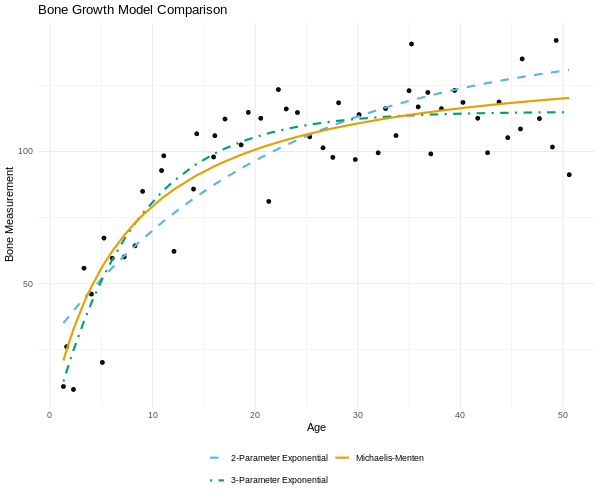

In [26]:
%%R -w 600 -h 500 -u px
# Add predictions
jaw_data <- jaw_data %>%
  mutate(
    mm_pred = predict(mm_model),
    exp2_pred = predict(exp2_model),
    exp3_pred = predict(exp3_model)
  )


# Reshape predictions into long format for legend
jaw_data_long <- jaw_data %>%
  pivot_longer(
    cols = c(mm_pred, exp2_pred, exp3_pred),
    names_to = "Model",
    values_to = "Prediction"
  ) %>%
  mutate(
    Model = case_when(
      Model == "mm_pred" ~ "Michaelis-Menten",
      Model == "exp2_pred" ~ "2-Parameter Exponential",
      Model == "exp3_pred" ~ "3-Parameter Exponential"
    )
  )

# Define colors and linetypes
model_colors <- c(
  "Michaelis-Menten" = "#E69F00",
  "2-Parameter Exponential" = "#56B4E9",
  "3-Parameter Exponential" = "#009E73"
)

model_linetypes <- c(
  "Michaelis-Menten" = "solid",
  "2-Parameter Exponential" = "dashed",
  "3-Parameter Exponential" = "dotdash"
)

ggplot(jaw_data_long, aes(x = age, y = bone)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_line(
    aes(y = Prediction, color = Model, linetype = Model),
    linewidth = 1
  ) +
  scale_color_manual(values = model_colors) +
  scale_linetype_manual(values = model_linetypes) +
  labs(
    title = "Bone Growth Model Comparison",
    x = "Age",
    y = "Bone Measurement"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    legend.title = element_blank(),  # Remove legend title
    legend.spacing.x = unit(0.5, "cm")  # Add spacing between legend items
  ) +
  guides(
    color = guide_legend(nrow = 2),  # Split color legend into 2 lines
    linetype = guide_legend(nrow = 2)  # Split linetype legend into 2 lines
  )


## Summary and Conclusion

In this tutorial, we explored the concept of **asymptotic functions** and their applications in modeling real-world phenomena using R. We specifically focused on fitting asymptotic exponential models, demonstrating how they can effectively describe processes that approach a limiting value over time.  

Through **nonlinear regression with `nls()`**, we successfully estimated model parameters and visualized the fitted function, emphasizing the importance of selecting appropriate starting values for convergence. Additionally, we discussed model evaluation techniques, including residual analysis, to assess goodness-of-fit.  

Understanding asymptotic functions is crucial in various fields such as **biology, economics, and engineering**, where growth, decay, or saturation processes are prevalent. Mastering these techniques in R allows for more accurate predictions and deeper insights into data behavior.  

## References

Here are some books and online resources that provide comprehensive information about exponential models, including their applications, fitting techniques, and theoretical foundations:

### Books

1. **"Nonlinear Regression with R" by Christian Ritz and Jens C. Streibig**
   - This book provides an in-depth treatment of nonlinear regression models, including exponential models. It covers the mathematical theory, model fitting, and interpretation using R.

2. **"Applied Regression Analysis and Generalized Linear Models" by John Fox**
   - This book covers a wide range of regression models, including exponential regression. It provides theoretical insights and practical examples using R.

3. **"Nonlinear Models for Repeated Measurement Data" by Marie Davidian and David M. Giltinan**
   - This book focuses on nonlinear models, including exponential models, for analyzing repeated measurement data. It includes detailed discussions on model fitting and interpretation.

4. **"Regression Modeling Strategies" by Frank E. Harrell Jr.**
   - This book covers various regression modeling strategies, including nonlinear and exponential models. It provides practical guidance on model selection, fitting, and validation.

5. **"An Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani**
   - This book provides an accessible introduction to statistical learning, including exponential models. It includes practical examples and R code.

### Online Resources

1. **Coursera - "Regression Models" by Johns Hopkins University**
   - This online course covers various regression models, including exponential models. It provides video lectures, quizzes, and practical exercises using R.
   - [Course Link](https://www.coursera.org/learn/regression-models)

2. **Khan Academy - "Exponential Models"**
   - Khan Academy offers free tutorials on exponential models, including video lectures and practice exercises.
   - [Exponential Models on Khan Academy](https://www.khanacademy.org/math/algebra2/exponential-and-logarithmic-functions)

3. **R Documentation - "nls function"**
   - The `nls` function in R is used for fitting nonlinear models, including exponential models. The R documentation provides detailed information on how to use this function.
   - [nls Function Documentation](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/nls)

4. **Cross Validated (Stack Exchange) - Discussions on Exponential Models**
   - Cross Validated is a Q&A site for statistics, machine learning, and data analysis. You can find many discussions on exponential models and their applications.
   - [Cross Validated](https://stats.stackexchange.com/)

5. **DataCamp - "Nonlinear Modeling in R"**
   - DataCamp offers a course on nonlinear modeling in R, which includes exponential models. The course provides interactive coding exercises and practical examples.
   - [Nonlinear Modeling in R](https://www.datacamp.com/courses/nonlinear-modeling-in-r)



